In [4]:
import pandas as pd
import pycountry 
from rapidfuzz import process
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [5]:
df= pd.read_csv(r"C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\KYC_analysis\kyc_onboarding_data.csv")


In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Full_name        477 non-null    object
 1   Client ID        500 non-null    object
 2   Date of Birth    500 non-null    object
 3   Country          500 non-null    object
 4   ID Number        448 non-null    object
 5   ID Type          500 non-null    object
 6   Onboarding Date  500 non-null    object
 7   KYC Status       454 non-null    object
 8   Account Type     500 non-null    object
 9   Aadhaar Number   2 non-null      object
 10  PAN              3 non-null      object
dtypes: object(11)
memory usage: 43.1+ KB


In [8]:
df.head(10)

,Full_name,Client ID,Date of Birth,Country,ID Number,ID Type,Onboarding Date,KYC Status,Account Type,Aadhaar Number,PAN
0,Dr. Julie Miller,CL148759,1991-01-07,Togo,tN137189,National ID,2022-09-22,Incomplete,Corporate,NaN,NaN
1,Richard Harrison,CL241176,1984-05-22,United Kingdom,sk795654,Passport,2022-08-26,Complete,HNI,NaN,NaN
2,Nicole Acosta,CL606390,1987-11-11,Puerto Rico,dQ407929,Passport,2023-09-29,Complete,HNI,NaN,NaN
3,Alyssa Washington,CL789461,1958-02-18,Sudan,rr814429,Driver License,2023-08-06,Incomplete,Corporate,NaN,NaN
4,Lindsey Kent,CL899407,1999-10-16,American Samoa,Fl275243,Driver License,2024-09-29,Incomplete,Corporate,NaN,NaN
5,William Coffey,CL731792,1990-01-11,Tokelau,UO276637,National ID,2023-03-19,Incomplete,HNI,NaN,NaN
6,Sarah Brown,CL327900,1967-06-30,Cote d'Ivoire,tE102767,National ID,2024-10-07,Incomplete,HNI,NaN,NaN
7,Michael Wells,CL286450,1959-05-19,Djibouti,Ru860476,National ID,2024-10-03,Complete,Corporate,NaN,NaN
8,Anne Schmidt,CL799565,1973-07-31,Pitcairn Islands,Zg694544,National ID,2023-08-03,Incomplete,Corporate,NaN,NaN
9,Julia Leonard,CL126499,1965-12-15,Palau,Ja938525,Passport,2025-05-13,Complete,Corporate,NaN,NaN


In [9]:
# Converting date cloumns to datetime 
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
df['Onboarding Date'] = pd.to_datetime(df['Onboarding Date'],errors='coerce')

In [10]:
# Load valid country names

valid_countries = [country.name for country in pycountry.countries]


# Function to match country with best real one
def correct_country_name(name):
    if pd.isnull(name):
        return name
    match, score,_ = process.extractOne(name,valid_countries)
    if score >80:
        return match
    else:
        return name


In [11]:
df['Country_Corrected'] = df['Country'].apply(correct_country_name)


In [12]:
# Missing values summary
missing_summary = df.isnull().sum().sort_values(ascending = False)
print("Missing Summary:\n",missing_summary)

Missing Summary:
 Aadhaar Number       498
PAN                  497
ID Number             52
KYC Status            46
Full_name             23
Client ID              0
Date of Birth          0
Country                0
ID Type                0
Onboarding Date        0
Account Type           0
Country_Corrected      0
dtype: int64


In [13]:
# Flaging missing values , marking Indian client and checking for sactioned country (Iran, North Korea)

def flag_row(row):
    flags =[]
    # Missing name
    if pd.isnull(row['Full_name']):
        flags.append("Missing Full Name")
    # Incomplete KYC
    if pd.isnull(row['KYC Status']) or row['KYC Status'].strip().lower() == "incomplete":
        flags.append("Incomplete KYC")
    # Missing Client ID    
    if pd.isnull(row['Client ID']):
        flags.append("Missing client ID")
    # Checking for Indian client
    if row['Country'].strip().lower() == 'india':
        if pd.isnull(row['Aadhaar Number']):
             flags.append("Missing Aadhaar Number")
        if pd.isnull(row['PAN']):
             flags.append("Missing PAN")
    if row['Country'].strip().lower() in ['iran','north korea']:
        flags.append("High-Risk Country")

    return ", ".join(flags) if flags else "OK"
     
    

In [14]:
df['flag'] = df.apply(flag_row, axis =1)

## KYC Data Quality Issue Visualization


In [18]:
# All flag into one sectiom
all_flags = df['flag'].str.split(",").sum()

# Counting each issue
flag_count = Counter(all_flags)

C:\Users\amalm\AppData\Local\Temp\ipykernel_2416\1557805441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(flag_count.keys()), y=list(flag_count.values()), palette='viridis')


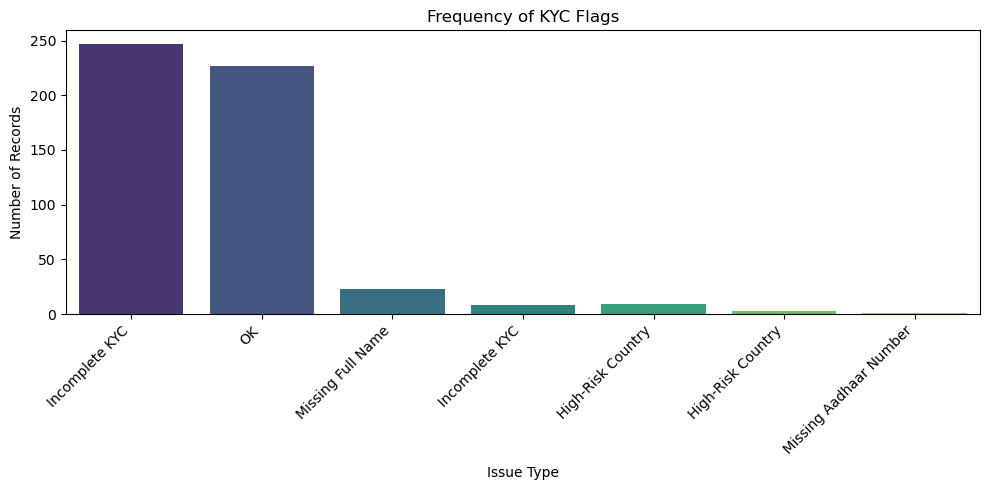

In [21]:
# Bar Chart of KYC Flags

plt.figure(figsize=(10,5))
sns.barplot(x=list(flag_count.keys()), y=list(flag_count.values()), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Frequency of KYC Flags")
plt.xlabel("Issue Type")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Full_name          477 non-null    object        
 1   Client ID          500 non-null    object        
 2   Date of Birth      500 non-null    datetime64[ns]
 3   Country            500 non-null    object        
 4   ID Number          448 non-null    object        
 5   ID Type            500 non-null    object        
 6   Onboarding Date    500 non-null    datetime64[ns]
 7   KYC Status         454 non-null    object        
 8   Account Type       500 non-null    object        
 9   Aadhaar Number     2 non-null      object        
 10  PAN                3 non-null      object        
 11  Country_Corrected  500 non-null    object        
 12  flag               500 non-null    object        
dtypes: datetime64[ns](2), object(11)
memory usage: 50.9+ KB


In [23]:
# Most common issue among HNI vs Corporate vs retail

df.groupby('Account Type')['flag'].value_counts().unstack().fillna(0).astype(int)

flag,High-Risk Country,Incomplete KYC,"Incomplete KYC, High-Risk Country","Incomplete KYC, Missing Aadhaar Number",Missing Full Name,"Missing Full Name, High-Risk Country","Missing Full Name, Incomplete KYC","Missing Full Name, Incomplete KYC, High-Risk Country",OK
Account Type,,,,,,,,,
Corporate,1,91,1,0,4,0,1,0,78
HNI,1,77,3,1,2,1,4,1,80
Retail,1,73,1,0,7,1,1,1,69


In [27]:
# summary table summary_table = df['flag'].value_counts().reset_index()
summary_table.columns = ['Issue Type', 'Number of Records']
summary_table


,Issue Type,Number of Records
0,Incomplete KYC,241
1,OK,227
2,Missing Full Name,13
3,"Missing Full Name, Incomplete KYC",6
4,"Incomplete KYC, High-Risk Country",5
5,High-Risk Country,3
6,"Missing Full Name, High-Risk Country",2
7,"Missing Full Name, Incomplete KYC, High-Risk C...",2
8,"Incomplete KYC, Missing Aadhaar Number",1


In [ ]:
# Export flagged record for reporting or audit
flagged =df[df['flag'] != "OK"]
flagged.to_csv(r"C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\KYC_analysis\flagged_kyc_records.csv", index=False)